In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib

pd.set_option('max_columns', None)

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
df_can = pd.read_excel('http://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataFrame!')

Data downloaded and read into a dataFrame!


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df_can.shape)

(195, 51)


In [6]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace = True)

df_can.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace = True)
                         
df_can.columns = list(map(str, df_can.columns)) 
                         
df_can.set_index('Country', inplace = True)
                         
df_can['Total'] = df_can.sum(axis = 1)
                         
years = list(map(str, range(1980, 2014)))

print('data dimensions:', df_can.shape)                        

data dimensions: (195, 46)


In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.3.4


In [8]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3901.0
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2327.0
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5866.0


In [9]:
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]
                         
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [10]:
width = 40
height = 10

total_num_tiles = width * height

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [11]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[1] + ': ' +str(tiles))

Norway: 129
Norway: 77
Norway: 194


In [12]:
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index +=1
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
            
        waffle_chart[row, col] = category_index
            
print('Waffle chart populated!')

Waffle chart populated!


In [13]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

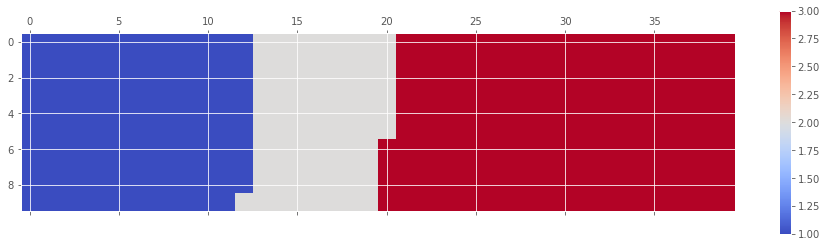

In [14]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

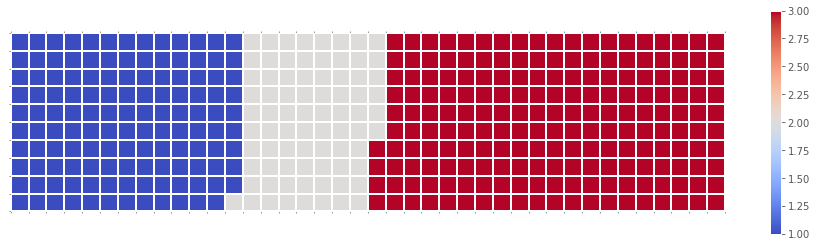

In [15]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

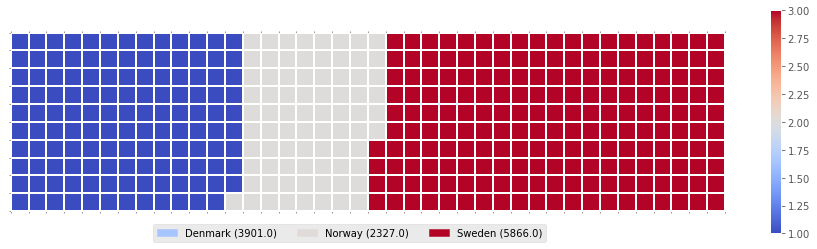

In [16]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]


legend_handles=[]
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

plt.legend(handles=legend_handles, loc='lower center', ncol=len(df_dsn.index.values), bbox_to_anchor=(0., -0.2, 0.95, .1))

In [17]:
def create_waffle_chart(values, height, width, colormap):
    total_values = sum(values)
    
    category_proportion = [(value / total_values) for value in values]
    
    total_num_tiles = width * height
    print('Num of tiles = {}'.format(total_num_tiles))
    
    tiles_per_category = [round(proportion * total_num_tiles) for proportion 
                          in category_proportion]
    
    waffle_chart = np.zeros((height, width))
    category_index = 0
    tile_index = 0
    
    for col in range(width):
        for row in range(height):
            tile_index += 1
            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1
                
            waffle_chart[row, col] = category_index
            
    fig = plt.figure()

    list_cmap = {'coolwarm': plt.cm.coolwarm,
                 'coolwarm_r': plt.cm.coolwarm_r,
                 'YlGn': plt.cm.YlGn, 
                 'YlOrBr': plt.cm.YlOrBr}
    colormap = list_cmap[colormap]
    print(colormap)
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])
    plt.show()

Num of tiles = 400


<Figure size 432x288 with 0 Axes>

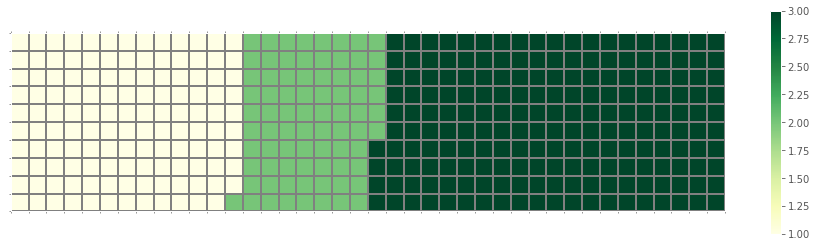

In [18]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

create_waffle_chart(values=df_dsn['Total'], height=10, width=40, colormap='YlGn')

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,659962.0
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,422,324,494,379,506,605,907,956,826,994,924,897,1083,1010,1092,806,817,973,1067,1212,1250,1284,1194,1168,1265,1214,982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27707.0
Indonesia,Asia,South-Eastern Asia,Developing regions,186,178,252,115,123,100,127,213,270,260,227,252,243,278,262,205,231,166,165,525,1138,907,709,515,552,632,613,657,661,504,712,390,395,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13150.0


Num of tiles = 400


<Figure size 432x288 with 0 Axes>

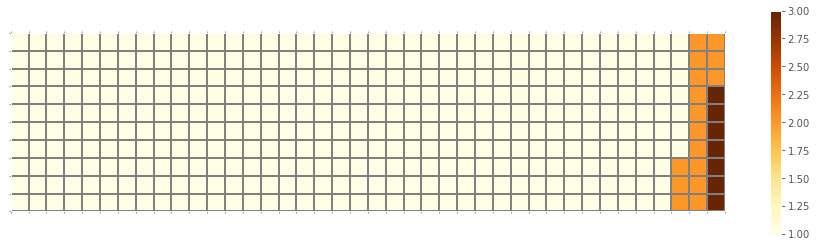

In [19]:
df_new = df_can.loc[['China', 'Japan', 'Indonesia'], :]
display(df_new)

create_waffle_chart(values=df_new['Total'], 
                    height=10, 
                    width=40, colormap='YlOrBr')

In [20]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for 
value in values]

    total_num_tiles = width * height
    print('Total number of tiles is', total_num_tiles)

    tiles_per_category = [round(proportion * total_num_tiles) for 
proportion in category_proportions]

    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[1] + ': ' + str(tiles))
    
    waffle_chart = np.zeros((height, width))

    category_index = 0
    tile_index = 0

    for col in range(width):
        for row in range(height):
            tile_index += 1
        
            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1
    
            waffle_chart[row, col] = category_index
    
    fig = plt.figure()
    
    
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()


    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])


    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[1]) + ')' 
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val,
label=label_str))
        
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories), 
        bbox_to_anchor=(0., -0.2, 0.95, .1)  
    )

In [21]:
width = 40
height = 10

categories = df_dsn.index.values
values = df_dsn['Total']

colormap = plt.cm.coolwarm

Total number of tiles is 400
Norway: 129
Norway: 77
Norway: 194


<Figure size 432x288 with 0 Axes>

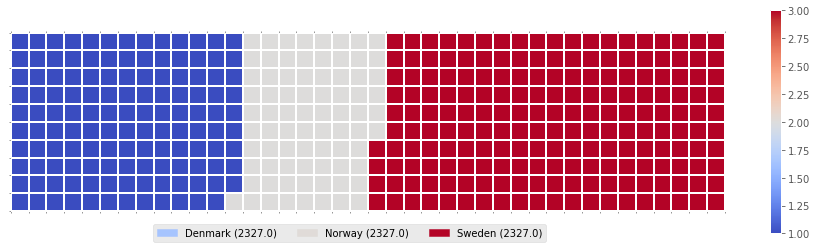

In [22]:
create_waffle_chart(categories, values, height, width, colormap)

In [23]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [30]:
import urllib
content = urllib.request.urlopen(url) 
alice_novel = content.read().decode('utf8')

NameError: name 'url' is not defined

In [24]:
!wget --quiet
https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -0 alice_novel.txt
    
alice_novel = open('alice_novel.txt', 'r').read()

print('File downloaded and saved!')
    
    

SyntaxError: invalid syntax (<ipython-input-24-b2cba16a2886>, line 2)

In [34]:
stopwords = set(STOPWORDS)

In [35]:
alice_wc = WordCloud(background_color='white',
                     max_words=2000,
                     stopwords=stop)

alice_wc.generate(alice_novel)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'stop' is not defined

In [36]:
fig = plt.figure(dpi=500)
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'alice_wc' is not defined

<Figure size 7000x9000 with 0 Axes>

In [37]:
'said' in stop

NameError: name 'stop' is not defined

In [38]:
mask = np.array(Image.open('alice_mask.png'))
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'Image' is not defined

In [39]:
alice_wc = WordCloud(background_color='white',
                     max_words=2000,
                     mask=mask,
                     stopwords=stop)

alice_wc.generate(alice_novel)

fig = plt.figure(dpi=150)
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'mask' is not defined

In [56]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice-mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'alice' is not defined

<Figure size 1008x1296 with 0 Axes>

In [57]:
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figweight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'alice_wc' is not defined

In [40]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [41]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153.0

In [42]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country,
'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [43]:
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


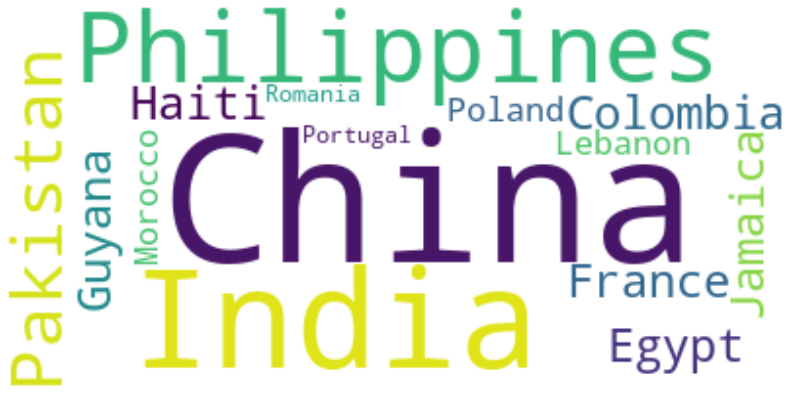

In [44]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
!pip install seaborn

import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [46]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(float,df_tot.index)

df_tot.reset_index(inplace = True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


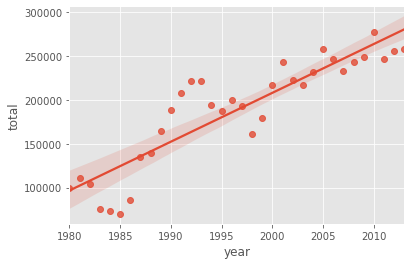

In [47]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

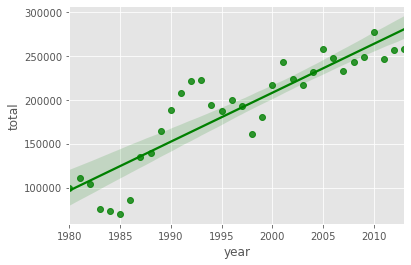

In [48]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

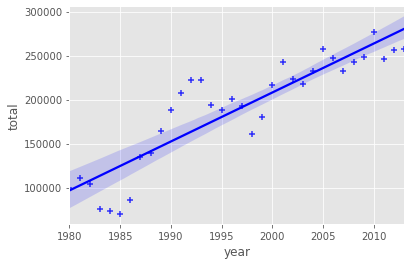

In [49]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='+')

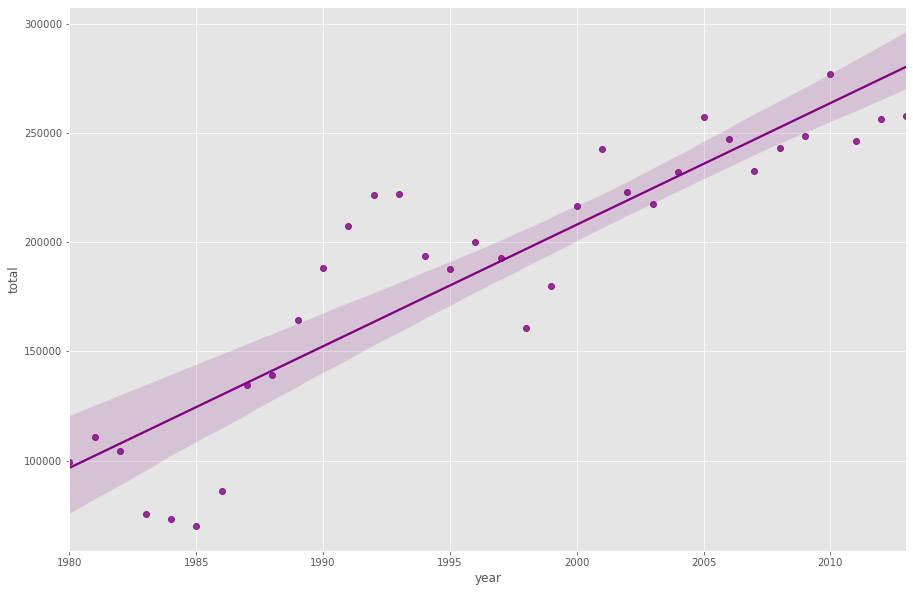

In [50]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='purple')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 -2013')

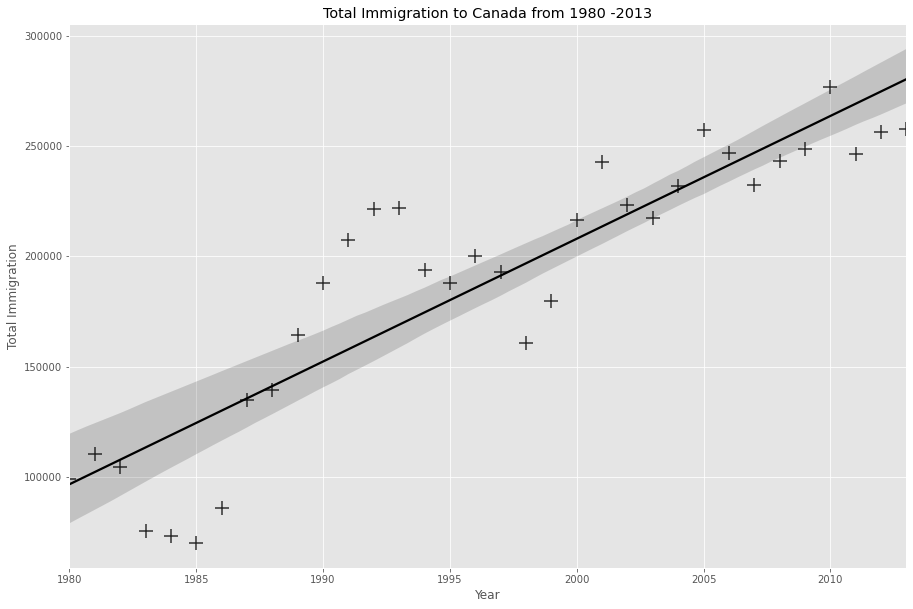

In [51]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='black',
marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
       
ax.set_title('Total Immigration to Canada from 1980 -2013')


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

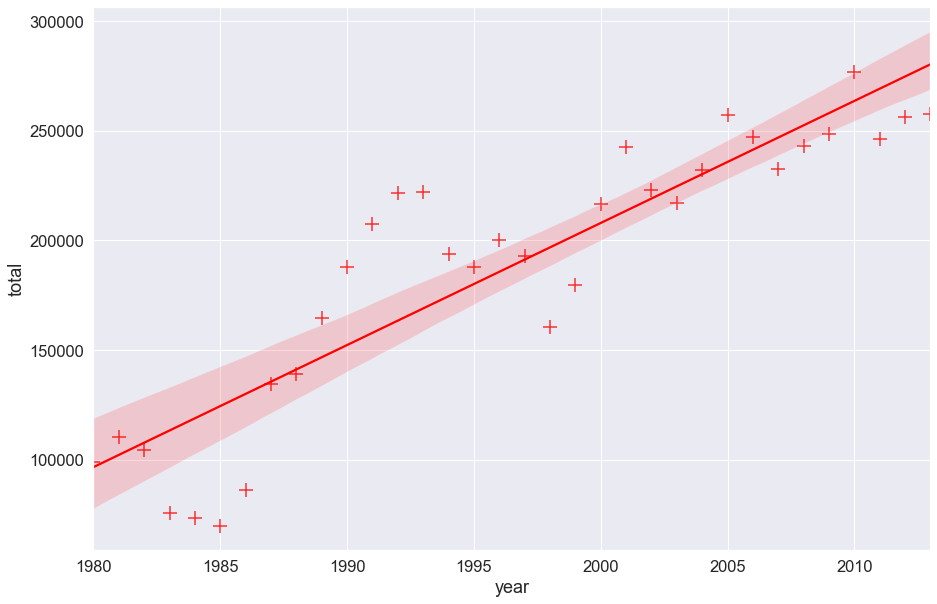

In [52]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)

x = sns.regplot(x='year', y='total', data=df_tot, color='red',
marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
       
ax.set_title('Total Immigration to Canada from 1980 - 2013')


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

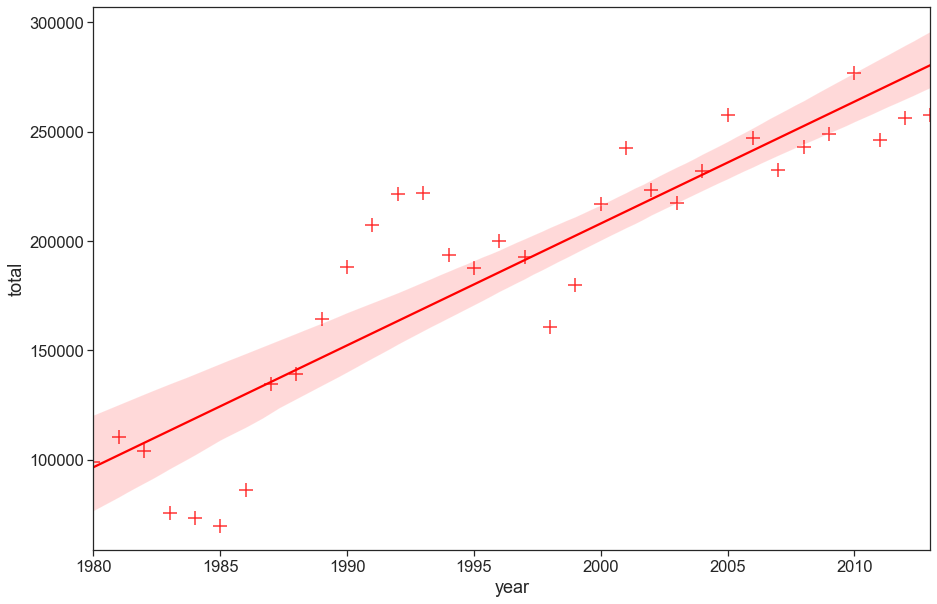

In [53]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

x = sns.regplot(x='year', y='total', data=df_tot, color='red',
marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
       
ax.set_title('Total Immigration to Canada from 1980 - 2013')


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

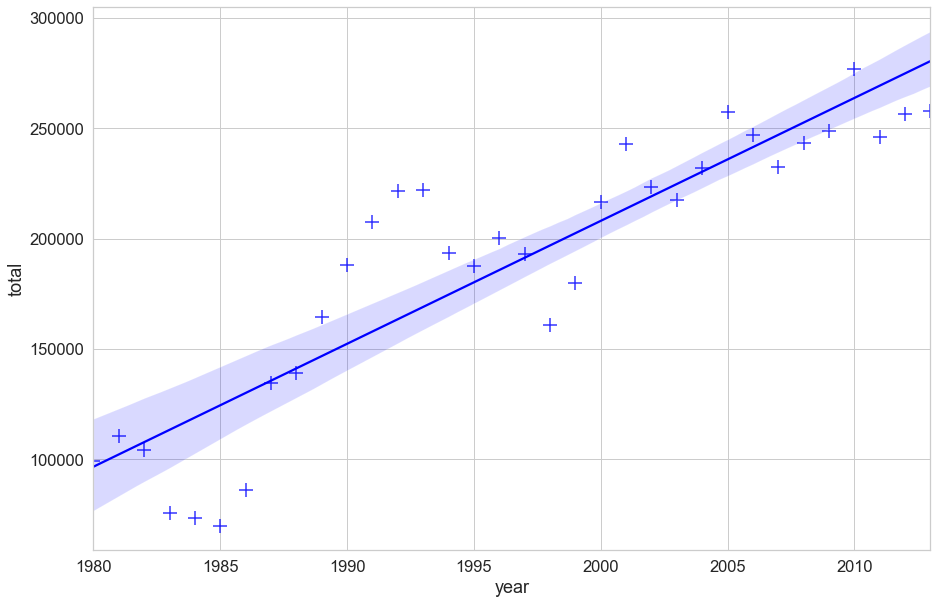

In [54]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

x = sns.regplot(x='year', y='total', data=df_tot, color='blue',
marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
       
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

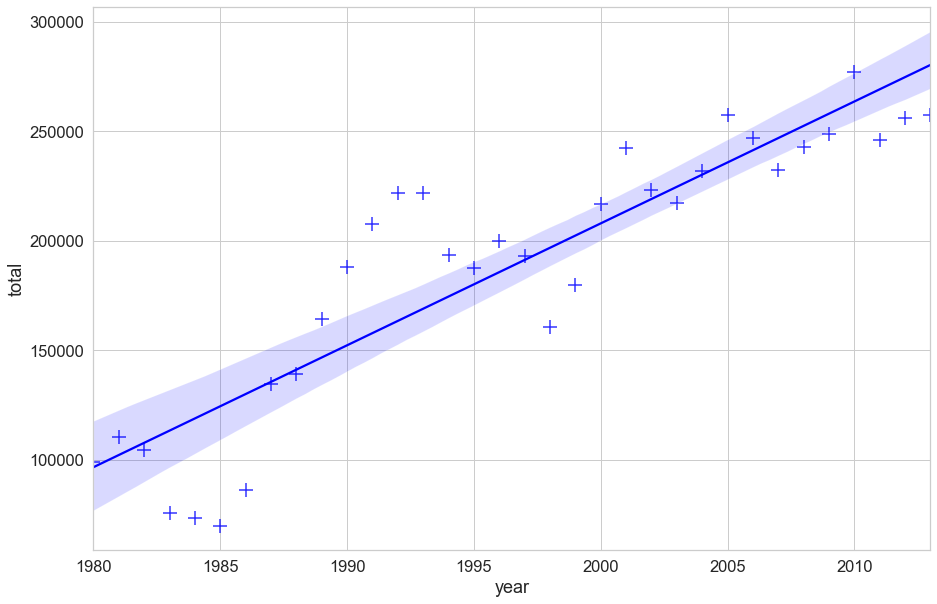

In [55]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)

df_total.columns = ['year', 'total']

df_total['year'] = df_total['year'].astype(int)

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

x = sns.regplot(x='year', y='total', data=df_tot, color='blue',
marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
       
ax.set_title('Total Immigration to Canada from 1980 - 2013')